# Expanded Dataset (Same one used for training but expanded)

In [3]:
import pandas as pd

df = pd.read_csv('tweets_preprocessed.csv')
df.sample(5)

,tweet_id,text,account,domain,background,label
21621,1587977573774102531,también visité el parque industrial la cantábr...,@alferdez,PERSON,POL,ARG
12111,1608545879052455937,la electricidad cae este viernes a 547 eurosmw...,@20m,ORG,NEW,ES
19835,1565435770852331524,participaron la presidenta del grupo iratxegar...,@CFKArgentina,PERSON,POL,ARG
17736,1580014658840403968,mariano rodríguez se lució con su versión de g...,@eltreceoficial,ORG,NEW,ARG
15198,1608568072595447808,la muerte de pelé la despedida de los famosos ...,@LANACION,ORG,NEW,ARG


# Word occurrance within the Dataset

In [2]:
grammatical_feats = ["tú","vos","tienes","tenés","haz","ustedes","vosotros","miren","mirad",
         "hice","he hecho","hagan","haced","fui","he ido","allí","aquí","allá","acá",
        "os digo","les digo","vuestro","de ustedes","estaréis","van a estar","mirá"]

In [39]:
import pandas as pd
from nltk.tokenize import word_tokenize

def count_word_frequency(df, words):
    background_classes = df['background'].unique()
    labels = df['label'].unique()

    word_counts = {label: {word: {class_name: 0 for class_name in background_classes} for word in words} for label in labels}
    mean_occurrences = {label: {word: {class_name: 0 for class_name in background_classes} for word in words} for label in labels}

    for background_class in background_classes:
        for label in labels:
            filtered_df = df[(df['background'] == background_class) & (df['label'] == label)]
            total_tweets = len(filtered_df)

            for word in words:
                count = 0
                for text in filtered_df['text']:
                    tokens = word_tokenize(text)
                    count += tokens.count(word)
                word_counts[label][word][background_class] = count
                mean_occurrences[label][word][background_class] = count / total_tweets if total_tweets > 0 else 0

    return word_counts, mean_occurrences

# Example usage
df = pd.read_csv('tweets_preprocessed.csv')

word_counts, mean_occurrences = count_word_frequency(df, grammatical_feats)

# Print the word counts for each background class given each label
for label, counts in word_counts.items():
    print(f"Label: {label}")
    for word, class_counts in counts.items():
        print(f"Word: {word}")
        for background_class, count in class_counts.items():
            print(f"Background Class: {background_class}")
            print(f"Count: {count}")
        print()

# Print the mean occurrences for each background class given each label
for label, occurrences in mean_occurrences.items():
    print(f"Label: {label}")
    for word, class_occurrences in occurrences.items():
        print(f"Word: {word}")
        for background_class, occurrence in class_occurrences.items():
            print(f"Background Class: {background_class}")
            print(f"Mean Occurrence: {occurrence}")
        print()


Label: ES
Word: tú
Background Class: ART
Count: 11
Background Class: POL
Count: 8
Background Class: MEDIA
Count: 7
Background Class: NEW
Count: 3
Background Class: SPORT
Count: 0

Word: vos
Background Class: ART
Count: 0
Background Class: POL
Count: 0
Background Class: MEDIA
Count: 2
Background Class: NEW
Count: 1
Background Class: SPORT
Count: 0

Word: tienes
Background Class: ART
Count: 1
Background Class: POL
Count: 1
Background Class: MEDIA
Count: 1
Background Class: NEW
Count: 8
Background Class: SPORT
Count: 0

Word: tenes
Background Class: ART
Count: 0
Background Class: POL
Count: 0
Background Class: MEDIA
Count: 1
Background Class: NEW
Count: 0
Background Class: SPORT
Count: 0

Word: tenés
Background Class: ART
Count: 0
Background Class: POL
Count: 0
Background Class: MEDIA
Count: 1
Background Class: NEW
Count: 0
Background Class: SPORT
Count: 0

Word: haz
Background Class: ART
Count: 1
Background Class: POL
Count: 0
Background Class: MEDIA
Count: 1
Background Class: NEW
Count:

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize

def count_word_frequency(df, words):
    background_classes = df['background'].unique()

    word_counts = {word: {class_name: 0 for class_name in background_classes} for word in words}
    mean_occurrences = {word: {class_name: 0 for class_name in background_classes} for word in words}

    for background_class in background_classes:
        filtered_df = df[df['background'] == background_class]
        total_tweets = len(filtered_df)

        for word in words:
            count = 0
            for text in filtered_df['text']:
                tokens = word_tokenize(text)
                count += tokens.count(word)
            word_counts[word][background_class] = count
            mean_occurrences[word][background_class] = count / total_tweets if total_tweets > 0 else 0

    return word_counts, mean_occurrences

# Example usage
df = pd.read_csv('tweets_preprocessed.csv')
words = [
        # Sports
        'fútbol', 'pelota', 'chutar', 'equipo', 'selección', 'deporte',
        'cancha', 'arquero', 'gol', "golazo",
        # News
        'noticias', 'información', 'novedades', 'acontecimientos', 'titulares',
        'reportajes', 'crónicas', 'sucesos', 'últimas', 'prensa',
        # Politics
        'política', 'asuntos públicos', 'gobierno', 'administración', 'mandato',
        'legislatura', 'votación', 'políticos', 'ideología', 'corrupción', "gestión","pensiones","jubilaciones",
        # Social Media
        'redes', 'medios', 'plataformas', 'publicaciones', 'comentarios',
        'likes', 'seguidores', 'influenciadores', 'tendencias', 'compartir', "contundente",
        # Arts and Culture
        'arte', 'cultura', 'música', 'cine', 'películas', 'teatro', 'espectáculos',
        'obra', 'artistas', 'exposiciones',
        # Education
        'educación', 'enseñanza', 'estudio', 'escuela', 'colegio', 'universidad',
        'profesores', 'alumnos', 'exámenes', 'aprendizaje',
        # Business and Economy
        'negocio', 'empresa', 'industria', 'comercio', 'mercado', 'ventas',
        'cliente', 'inversión', 'economía', 'empleo',
        # Health and Wellness
        'salud', 'bienestar', 'medicina', 'sanidad', 'hospital', 'enfermedad',
        'tratamiento', 'nutrición', 'ejercicio', 'médico',
        # Slang
        "che", "boludo", "guacho", "chabón", "morfar", "chamuyar", "laburo", "canuto", "birra",
        "feca", "mina", "churro", "boludear", "quilombo", "fiaca", "macaneo", "bancar", "mango", "lío",
        "trucho", "fachero", "cheto", "mambo", "pinta", "boludez", "morfi", 
        "buena onda", "chamuyo", "boliche", "bardo", "guita", "petardo", "boludeo", "curro",
        "bolichero", "pibe", "chupi", "paty", "birrita", "chabomba", "empomar", "asado",
        "joda", "colega", "guay", "molar", "flipar", "chaval", "majo", "currar", "chungo", "guiri", "quillo",
        "pijo", "mola", "tío", "chulo", "trabajar", "rollo", "turista", "amigo", "ligar",
        "friki", "copas", "rey","pavada"
    ]

word_counts, mean_occurrences = count_word_frequency(df, words)

# Print the word counts for each background class
for word, counts in word_counts.items():
    print(f"Word: {word}")
    for background_class, count in counts.items():
        print(f"Background Class: {background_class}")
        print(f"Count: {count}")
    print()

# Print the mean occurrences for each background class
for word, occurrences in mean_occurrences.items():
    print(f"Word: {word}")
    for background_class, occurrence in occurrences.items():
        print(f"Background Class: {background_class}")
        print(f"Mean Occurrence: {occurrence}")
    print()



Word: fútbol
Background Class: ART
Count: 7
Background Class: POL
Count: 24
Background Class: MEDIA
Count: 11
Background Class: NEW
Count: 129
Background Class: SPORT
Count: 7

Word: pelota
Background Class: ART
Count: 0
Background Class: POL
Count: 3
Background Class: MEDIA
Count: 3
Background Class: NEW
Count: 9
Background Class: SPORT
Count: 6

Word: chutar
Background Class: ART
Count: 0
Background Class: POL
Count: 0
Background Class: MEDIA
Count: 0
Background Class: NEW
Count: 1
Background Class: SPORT
Count: 0

Word: equipo
Background Class: ART
Count: 12
Background Class: POL
Count: 112
Background Class: MEDIA
Count: 17
Background Class: NEW
Count: 83
Background Class: SPORT
Count: 13

Word: selección
Background Class: ART
Count: 1
Background Class: POL
Count: 14
Background Class: MEDIA
Count: 5
Background Class: NEW
Count: 122
Background Class: SPORT
Count: 39

Word: deporte
Background Class: ART
Count: 0
Background Class: POL
Count: 29
Background Class: MEDIA
Count: 1
Backgrou

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

def count_word_frequency(df, words):
    background_classes = df['background'].unique()

    word_counts = {word: {class_name: 0 for class_name in background_classes} for word in words}
    mean_occurrences = {word: {class_name: 0 for class_name in background_classes} for word in words}

    for background_class in background_classes:
        filtered_df = df[df['background'] == background_class]
        total_tweets = len(filtered_df)

        for word in words:
            count = 0
            for text in filtered_df['text']:
                tokens = word_tokenize(text)
                count += tokens.count(word)
            word_counts[word][background_class] = count
            mean_occurrences[word][background_class] = count / total_tweets if total_tweets > 0 else 0

    return word_counts, mean_occurrences

# Example usage
df = pd.read_csv('tweets_preprocessed.csv')
words = [

    ]

word_counts, mean_occurrences = count_word_frequency(df, words)

# Print the word counts for each background class
for word, counts in word_counts.items():
    print(f"Word: {word}")
    for background_class, count in counts.items():
        print(f"Background Class: {background_class}")
        print(f"Count: {count}")
    print()

# Print the mean occurrences for each background class
for word, occurrences in mean_occurrences.items():
    print(f"Word: {word}")
    for background_class, occurrence in occurrences.items():
        print(f"Background Class: {background_class}")
        print(f"Mean Occurrence: {occurrence}")
    print()


# Reduction of the words list to only include words that appear in the Dataset

In [2]:
words = [
        # Sports
        'fútbol', 'pelota', 'equipo', 'selección', 'deporte',
        'cancha', 'arquero', 'gol', "golazo",
        # News
        'noticias', 'información', 'novedades', 'acontecimientos', 'titulares',
        'crónicas', 'sucesos', 'últimas', 'prensa',
        # Politics
        'política', 'asuntos públicos', 'gobierno', 'administración', 'mandato',
        'legislatura', 'votación', 'políticos', 'ideología', 'corrupción', "gestión","pensiones","jubilaciones",
        # Social Media
        'redes', 'medios', 'plataformas', 'comentarios',
        'seguidores', 'tendencias', 'compartir', "contundente",
        # Arts and Culture
        'arte', 'cultura', 'música', 'cine', 'películas', 'teatro', 'espectáculos',
        'obra', 'artistas', 'exposiciones',
        # Education
        'educación', 'enseñanza', 'estudio', 'escuela', 'colegio', 'universidad',
        'profesores', 'alumnos', 'aprendizaje',
        # Economy
        'negocio', 'empresa', 'industria', 'comercio', 'mercado', 'ventas',
        'cliente', 'inversión', 'economía', 'empleo',
        # Health
        'salud', 'bienestar', 'medicina', 'sanidad', 'hospital', 'enfermedad',
        'tratamiento', 'ejercicio', 'médico',
        # Slang
        "che", "boludo", "chabón", "chamuyar", "laburo","mina", "quilombo", "bancar", "lío",
        "fachero", "cheto", "pinta", "morfi", "boliche", "guita", "curro", "pibe", "birrita","asado",
        "colega", "flipar", "majo", "currar",
        "pijo", "mola", "tío", "trabajar", "rollo", "turista", "amigo", "ligar",
        "copas", "rey","pavada"
    ]

In [41]:
import pandas as pd
from nltk.tokenize import word_tokenize

def count_word_frequency(df, words):
    background_classes = df['background'].unique()
    labels = df['label'].unique()

    word_counts = {label: {word: {class_name: 0 for class_name in background_classes} for word in words} for label in labels}
    mean_occurrences = {label: {word: {class_name: 0 for class_name in background_classes} for word in words} for label in labels}

    for background_class in background_classes:
        for label in labels:
            filtered_df = df[(df['background'] == background_class) & (df['label'] == label)]
            total_tweets = len(filtered_df)

            for word in words:
                count = 0
                for text in filtered_df['text']:
                    tokens = word_tokenize(text)
                    count += tokens.count(word)
                word_counts[label][word][background_class] = count
                mean_occurrences[label][word][background_class] = count / total_tweets if total_tweets > 0 else 0

    return word_counts, mean_occurrences

# Example usage
df = pd.read_csv('tweets_preprocessed.csv')

word_counts, mean_occurrences = count_word_frequency(df, words)

# Print the word counts for each background class given each label
for label, counts in word_counts.items():
    print(f"Label: {label}")
    for word, class_counts in counts.items():
        print(f"Word: {word}")
        for background_class, count in class_counts.items():
            print(f"Background Class: {background_class}")
            print(f"Count: {count}")
        print()

# Print the mean occurrences for each background class given each label
for label, occurrences in mean_occurrences.items():
    print(f"Label: {label}")
    for word, class_occurrences in occurrences.items():
        print(f"Word: {word}")
        for background_class, occurrence in class_occurrences.items():
            print(f"Background Class: {background_class}")
            print(f"Mean Occurrence: {occurrence}")
        print()


Label: ES
Word: fútbol
Background Class: ART
Count: 7
Background Class: POL
Count: 10
Background Class: MEDIA
Count: 10
Background Class: NEW
Count: 49
Background Class: SPORT
Count: 0

Word: pelota
Background Class: ART
Count: 0
Background Class: POL
Count: 2
Background Class: MEDIA
Count: 3
Background Class: NEW
Count: 2
Background Class: SPORT
Count: 0

Word: equipo
Background Class: ART
Count: 9
Background Class: POL
Count: 27
Background Class: MEDIA
Count: 14
Background Class: NEW
Count: 17
Background Class: SPORT
Count: 0

Word: selección
Background Class: ART
Count: 1
Background Class: POL
Count: 9
Background Class: MEDIA
Count: 3
Background Class: NEW
Count: 20
Background Class: SPORT
Count: 0

Word: deporte
Background Class: ART
Count: 0
Background Class: POL
Count: 16
Background Class: MEDIA
Count: 1
Background Class: NEW
Count: 14
Background Class: SPORT
Count: 0

Word: cancha
Background Class: ART
Count: 0
Background Class: POL
Count: 0
Background Class: MEDIA
Count: 0
Back

# Word Embeddings

Some weights of the model checkpoint at ./new_stuff/checkpoint-500 were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMean

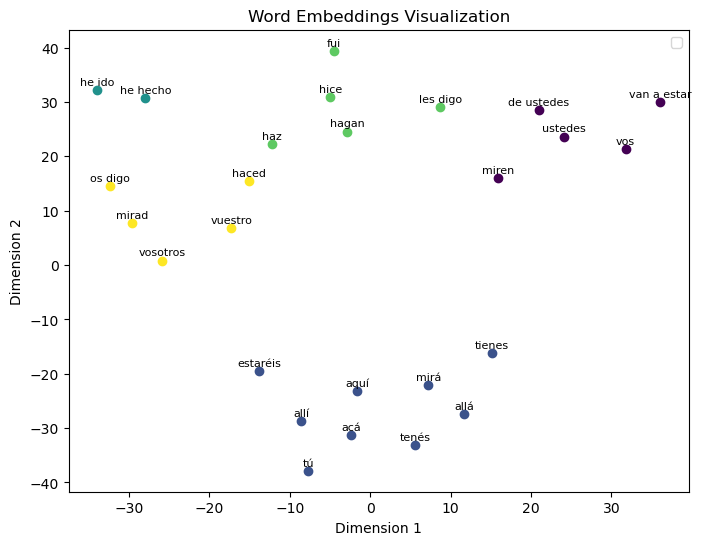

In [4]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def visualize_word_embeddings(words, model_path):
    # Load the tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained("dccuchile/distilbert-base-spanish-uncased")
    model = AutoModel.from_pretrained(model_path)

    # Tokenize the words
    tokens = tokenizer(words, return_tensors='pt', padding=True, truncation=True)

    # Obtain word embeddings
    with torch.no_grad():
        outputs = model(**tokens)
        word_embeddings = outputs.last_hidden_state.mean(dim=1)  # Average pooling over tokens

    # Reduce dimensionality to 2 dimensions
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    word_embeddings_2d = tsne.fit_transform(word_embeddings)

    # Apply clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    cluster_labels = kmeans.fit_predict(word_embeddings_2d)
    #cluster_centers = kmeans.cluster_centers_

    # Create a colormap based on the clusters
    colormap = plt.get_cmap('viridis', kmeans.n_clusters)

    # Plot the 2D embeddings with colored scatter plot points and annotations
    plt.figure(figsize=(8, 6))
    for i, word in enumerate(words):
        color = colormap(cluster_labels[i])
        plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1], c=np.array(color).reshape(1, -1))
        plt.text(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1] + 0.5, word, ha='center', va='bottom', fontsize=8)

    # Plot cluster centroids
    #plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label='Centroids')

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Word Embeddings Visualization")
    plt.legend()
    plt.show()


# Define the path to your fine-tuned BERT model
model_path = "./new_stuff/checkpoint-500"

# Visualize word embeddings
visualize_word_embeddings(grammatical_feats, model_path)

Some weights of the model checkpoint at ./multiclass_stuff/checkpoint-3500 were not used when initializing DistilBertModel: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarnin

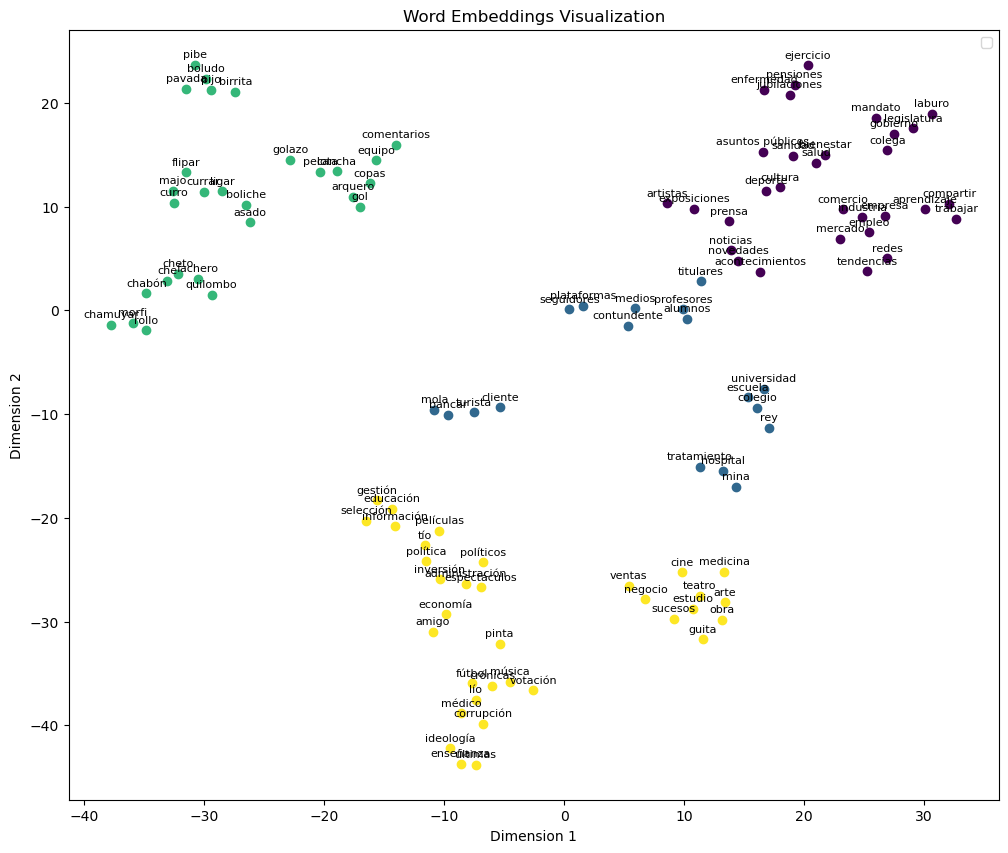

In [4]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def visualize_word_embeddings(words, model_path):
    # Load the tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained("dccuchile/distilbert-base-spanish-uncased")
    model = AutoModel.from_pretrained(model_path)

    # Tokenize the words
    tokens = tokenizer(words, return_tensors='pt', padding=True, truncation=True)

    # Obtain word embeddings
    with torch.no_grad():
        outputs = model(**tokens)
        word_embeddings = outputs.last_hidden_state.mean(dim=1)  # Average pooling over tokens

    # Reduce dimensionality to 2 dimensions
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    word_embeddings_2d = tsne.fit_transform(word_embeddings)

    # Apply clustering
    kmeans = KMeans(n_clusters=4, random_state=39)
    cluster_labels = kmeans.fit_predict(word_embeddings_2d)
    #cluster_centers = kmeans.cluster_centers_

    # Create a colormap based on the clusters
    colormap = plt.get_cmap('viridis', kmeans.n_clusters)

    # Plot the 2D embeddings with colored scatter plot points and annotations
    plt.figure(figsize=(12, 10))
    for i, word in enumerate(words):
        color = colormap(cluster_labels[i])
        plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1], c=np.array(color).reshape(1, -1))
        plt.text(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1] + 0.5, word, ha='center', va='bottom', fontsize=8)

    # Plot cluster centroids
    #plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label='Centroids')

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Word Embeddings Visualization")
    plt.legend()
    plt.show()



# Define the path to your fine-tuned BERT model
model_path = "./multiclass_stuff/checkpoint-3500"

# Visualize word embeddings
visualize_word_embeddings(words, model_path)

Some weights of the model checkpoint at ./new_stuff/checkpoint-500 were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMean

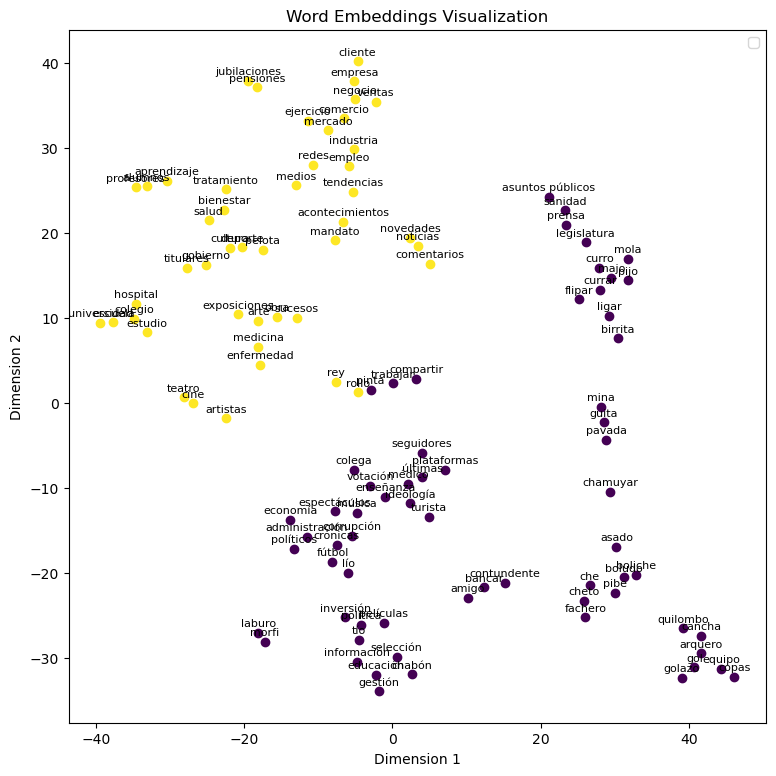

In [54]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def visualize_word_embeddings(words, model_path):
    # Load the tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained("dccuchile/distilbert-base-spanish-uncased")
    model = AutoModel.from_pretrained(model_path)

    # Tokenize the words
    tokens = tokenizer(words, return_tensors='pt', padding=True, truncation=True)

    # Obtain word embeddings
    with torch.no_grad():
        outputs = model(**tokens)
        word_embeddings = outputs.last_hidden_state.mean(dim=1)  # Average pooling over tokens

    # Reduce dimensionality to 2 dimensions
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    word_embeddings_2d = tsne.fit_transform(word_embeddings)

    # Apply clustering
    kmeans = KMeans(n_clusters=2, random_state=46)
    cluster_labels = kmeans.fit_predict(word_embeddings_2d)
    #cluster_centers = kmeans.cluster_centers_

    # Create a colormap based on the clusters
    colormap = plt.get_cmap('viridis', kmeans.n_clusters)

    # Plot the 2D embeddings with colored scatter plot points and annotations
    plt.figure(figsize=(9, 9))
    for i, word in enumerate(words):
        color = colormap(cluster_labels[i])
        plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1], c=np.array(color).reshape(1, -1))
        plt.text(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1] + 0.5, word, ha='center', va='bottom', fontsize=8)

    # Plot cluster centroids
    #plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label='Centroids')

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Word Embeddings Visualization")
    plt.legend()
    plt.show()


# Define the path to your fine-tuned BERT model
model_path = "./new_stuff/checkpoint-500"

# Visualize word embeddings
visualize_word_embeddings(words, model_path)

Some weights of the model checkpoint at ./new_stuff/checkpoint-500 were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMean

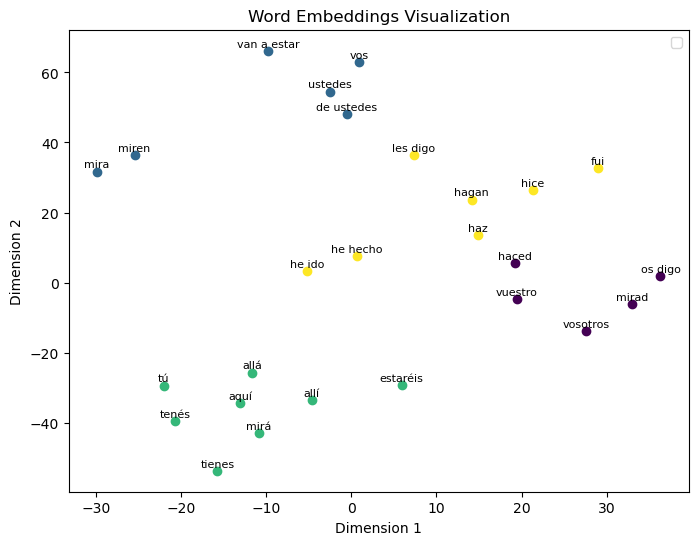

In [45]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def visualize_word_embeddings(words, model_path):
    # Load the tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained("dccuchile/distilbert-base-spanish-uncased")
    model = AutoModel.from_pretrained(model_path)

    # Tokenize the words
    tokens = tokenizer(words, return_tensors='pt', padding=True, truncation=True)

    # Obtain word embeddings
    with torch.no_grad():
        outputs = model(**tokens)
        word_embeddings = outputs.last_hidden_state.mean(dim=1)  # Average pooling over tokens

    # Reduce dimensionality to 2 dimensions
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    word_embeddings_2d = tsne.fit_transform(word_embeddings)

    # Apply clustering
    kmeans = KMeans(n_clusters=4, random_state=39)
    cluster_labels = kmeans.fit_predict(word_embeddings_2d)
    #cluster_centers = kmeans.cluster_centers_

    # Create a colormap based on the clusters
    colormap = plt.get_cmap('viridis', kmeans.n_clusters)

    # Plot the 2D embeddings with colored scatter plot points and annotations
    plt.figure(figsize=(8, 6))
    for i, word in enumerate(words):
        color = colormap(cluster_labels[i])
        plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1], c=np.array(color).reshape(1, -1))
        plt.text(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1] + 0.5, word, ha='center', va='bottom', fontsize=8)

    # Plot cluster centroids
    #plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label='Centroids')

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Word Embeddings Visualization")
    plt.legend()
    plt.show()

# Define the path to your fine-tuned BERT model
model_path = "./new_stuff/checkpoint-500"

# Visualize word embeddings
visualize_word_embeddings(grammatical_feats, model_path)